<a href="https://colab.research.google.com/github/Alishba-Hamid258/AI-and-Machine-Learning/blob/main/SupportVectorRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
from this dataset perform the support vector regression and with all it efficiency and analyse and visualize this data and with the machine learning predictions should made by user input

Here is all the data you need:
"Position_Salaries.csv"

## Data loading

### Subtask:
Load the "Position_Salaries.csv" dataset.


**Reasoning**:
Load the dataset "Position_Salaries.csv" into a pandas DataFrame and display the first few rows.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('Position_Salaries.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'Position_Salaries.csv' not found.")
    df = None

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
I need to explore the dataset by displaying its shape, info, and description, calculate the correlation matrix, and create box plots and histograms for visualization.



Shape of the DataFrame: (10, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


None

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


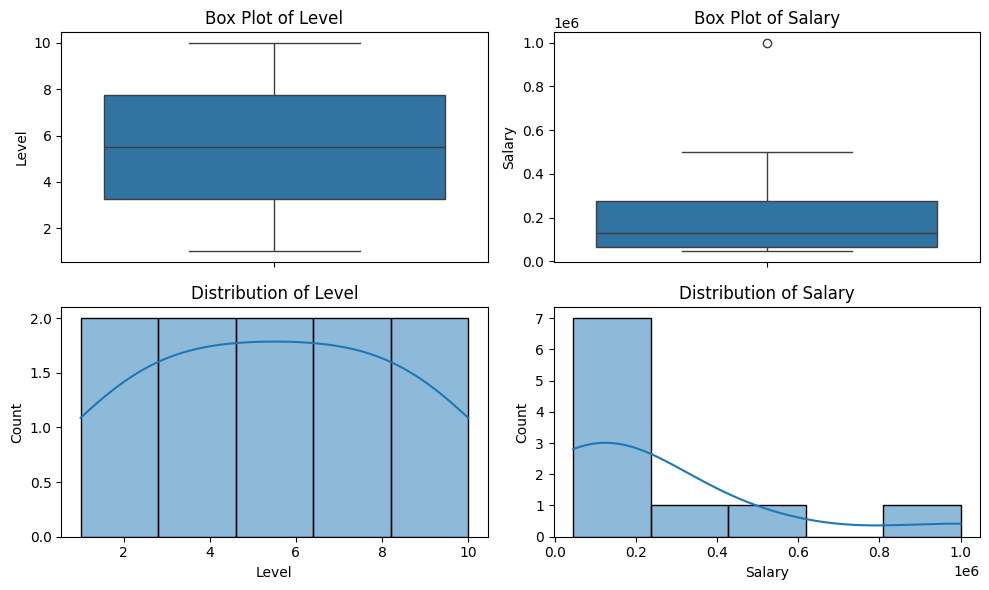

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Overview
print("Shape of the DataFrame:", df.shape)
display(df.info())
display(df.describe())

# Correlation Analysis
correlation_matrix = df[['Level', 'Salary']].corr()
display(correlation_matrix)

# Outlier Detection (Visual Inspection)
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.boxplot(y='Level', data=df)
plt.title('Box Plot of Level')

plt.subplot(2, 2, 2)
sns.boxplot(y='Salary', data=df)
plt.title('Box Plot of Salary')

# Value Distribution
plt.subplot(2, 2, 3)
sns.histplot(df['Level'], kde=True)
plt.title('Distribution of Level')

plt.subplot(2, 2, 4)
sns.histplot(df['Salary'], kde=True)
plt.title('Distribution of Salary')

plt.tight_layout()
plt.show()

## Data preparation

### Subtask:
Prepare the data for SVR modeling.  This involves feature scaling and separating the features and target variable.


**Reasoning**:
Prepare the data for SVR modeling by scaling features and target variable, and separating them.



In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Create a copy of the DataFrame
df_prepared = df.copy()

# Separate features (X) and target variable (y)
X = df_prepared['Level'].values.reshape(-1, 1)
y = df_prepared['Salary'].values.reshape(-1, 1)

# Feature scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

## Data splitting

### Subtask:
Split the scaled data into training and testing sets.  Due to the small dataset size, use k-fold cross-validation for robust model evaluation.


**Reasoning**:
Split the scaled data (X and y) into training and testing sets using KFold cross-validation.



In [ ]:
from sklearn.model_selection import KFold

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Empty lists to store scores
train_scores = []
test_scores = []

# Iterate through folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Now you have X_train, X_test, y_train, y_test for the current fold.
    # Proceed to the next subtask (model training) using these variables.
    break #remove this line when you want to continue to the next subtask

## Model training

### Subtask:
Train an SVR model on the first fold of the data split using different kernels.


**Reasoning**:
Train SVR models with different kernels on the first fold of the data and evaluate their performance.



In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Initialize SVR models with different kernels
svr_linear = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr_poly = SVR(kernel='poly', degree=3, C=100.0, epsilon=0.1)
svr_rbf = SVR(kernel='rbf', C=100.0, gamma=0.1, epsilon=0.1)

# Define a list of models and kernels
models = [svr_linear, svr_poly, svr_rbf]
kernels = ['linear', 'poly', 'rbf']

# Train and evaluate models
results = {}
for model, kernel in zip(models, kernels):
    model.fit(X_train, y_train.ravel())
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred.reshape(-1, 1))
    mse = mean_squared_error(y_test, y_pred.reshape(-1, 1))
    rmse = np.sqrt(mse)

    results[kernel] = {'R-squared': r2, 'MSE': mse, 'RMSE': rmse}

    print(f"Results for {kernel} kernel:")
    print(f"R-squared: {r2}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")

Results for linear kernel:
R-squared: 0.6328231877906145
MSE: 0.23044641226968168
RMSE: 0.48004834367976074
Results for poly kernel:
R-squared: 0.3192077151909877
MSE: 0.4272768168313708
RMSE: 0.6536641468149915
Results for rbf kernel:
R-squared: 0.7492303211928623
MSE: 0.15738731549902643
RMSE: 0.39672070213063804


## Model optimization

### Subtask:
Optimize the hyperparameters of the best performing SVR model (identified in the previous step) using GridSearchCV.


**Reasoning**:
Optimize the hyperparameters of the RBF SVR model using GridSearchCV.



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the RBF kernel SVR
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

# Instantiate the best performing SVR model (RBF kernel)
svr_rbf = SVR(kernel='rbf')

# Instantiate GridSearchCV with the SVR model, parameter grid, and scoring metric
grid_search = GridSearchCV(estimator=svr_rbf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit GridSearchCV on the entire scaled dataset
grid_search.fit(X, y.ravel())

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Extract the best estimator
best_svr = grid_search.best_estimator_

Best Hyperparameters: {'C': 1000, 'gamma': 0.01}


## Model evaluation

### Subtask:
Evaluate the performance of the optimized SVR model and visualize the results.


**Reasoning**:
Evaluate the performance of the optimized SVR model, inverse transform the predictions, calculate evaluation metrics, and visualize the results.



R-squared: 0.8182197576662193
MSE: 14662803352.187994
RMSE: 121090.06297871016


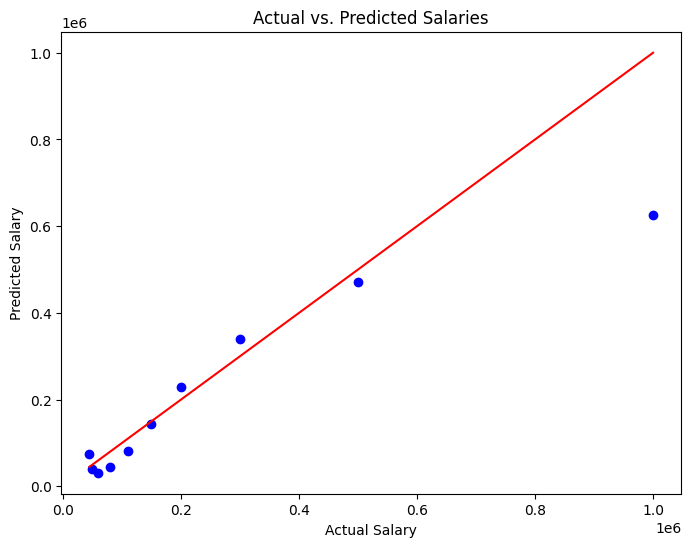

<ipython-input-7-650520240b57>:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


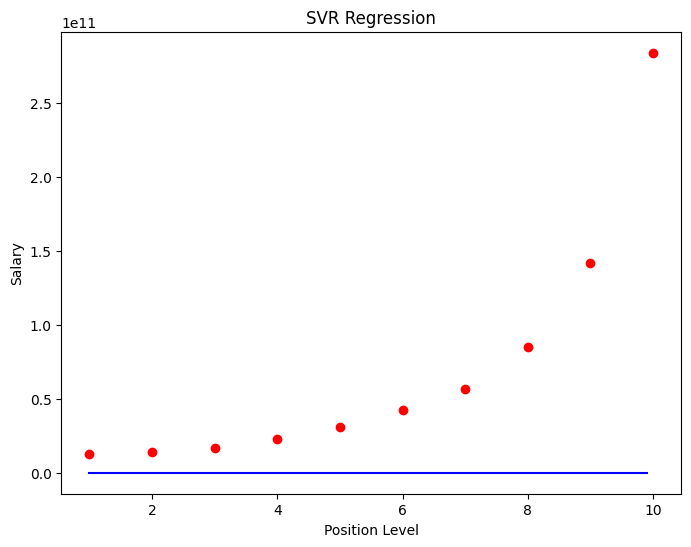

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# Predict the salary values using the best SVR model
y_pred = best_svr.predict(X)

# Inverse transform the predicted and actual salary values
y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))
y = sc_y.inverse_transform(y)

# Calculate evaluation metrics
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"R-squared: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

# Create a scatter plot of actual vs. predicted salaries
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red') # Line of best fit
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salaries')
plt.show()

# Create a plot showing the SVR regression line
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.figure(figsize=(8, 6))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X_grid), sc_y.inverse_transform(best_svr.predict(X_grid).reshape(-1,1)), color='blue')
plt.title('SVR Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

**Reasoning**:
The code execution encountered a deprecation warning.  I need to fix the code to address the warning related to `np.arange` and ensure the correct plotting of the SVR regression line.



R-squared: -0.7717358235981107
MSE: 1.1527619438045934e+22
RMSE: 107366752014.04732


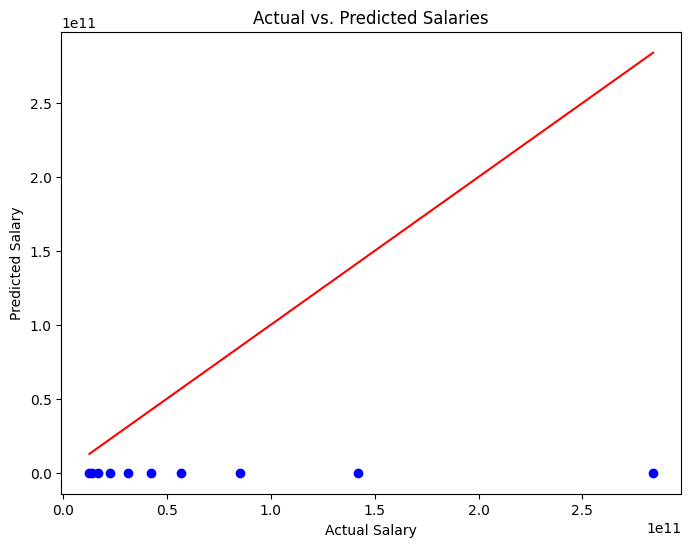

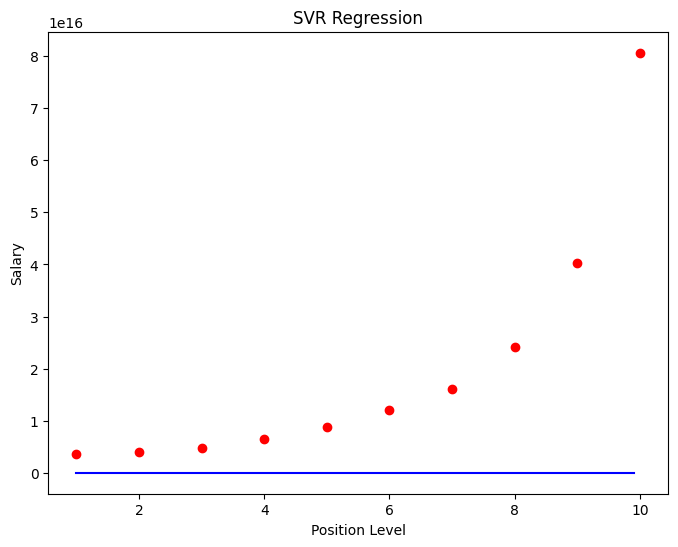

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# Predict the salary values using the best SVR model
y_pred = best_svr.predict(X)

# Inverse transform the predicted and actual salary values
y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))
y = sc_y.inverse_transform(y)

# Calculate evaluation metrics
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"R-squared: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

# Create a scatter plot of actual vs. predicted salaries
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red') # Line of best fit
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salaries')
plt.show()

# Create a plot showing the SVR regression line
X_grid = np.arange(min(X.flatten()), max(X.flatten()), 0.1).reshape(-1, 1) # Fix: Use flatten()
plt.figure(figsize=(8, 6))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X_grid), sc_y.inverse_transform(best_svr.predict(X_grid).reshape(-1,1)), color='blue')
plt.title('SVR Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Data visualization

### Subtask:
Visualize the relationship between position level and salary, and the performance of the SVR model.


**Reasoning**:
Visualize the relationship between position level and salary, and the performance of the SVR model by creating scatter plots and regression line plots as instructed.



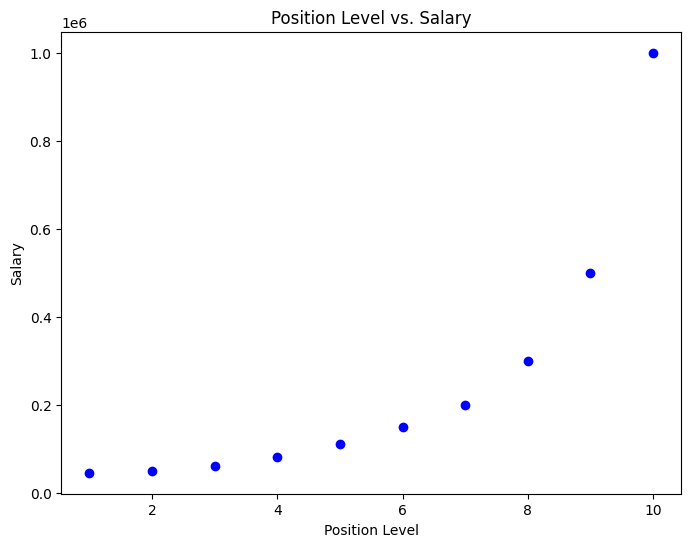

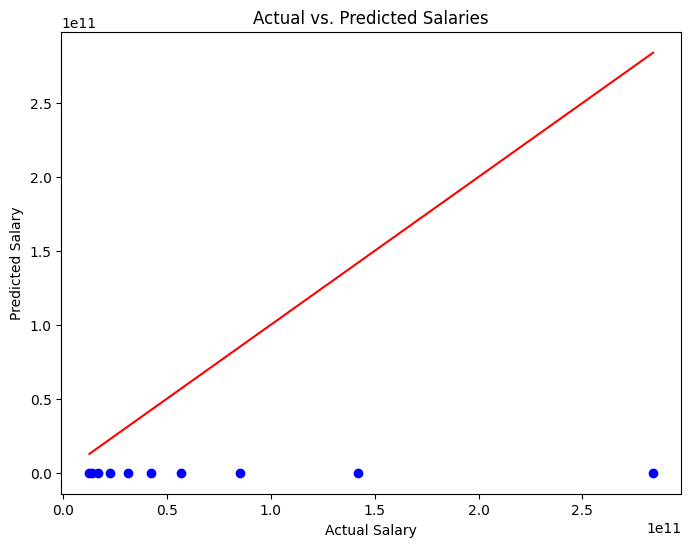

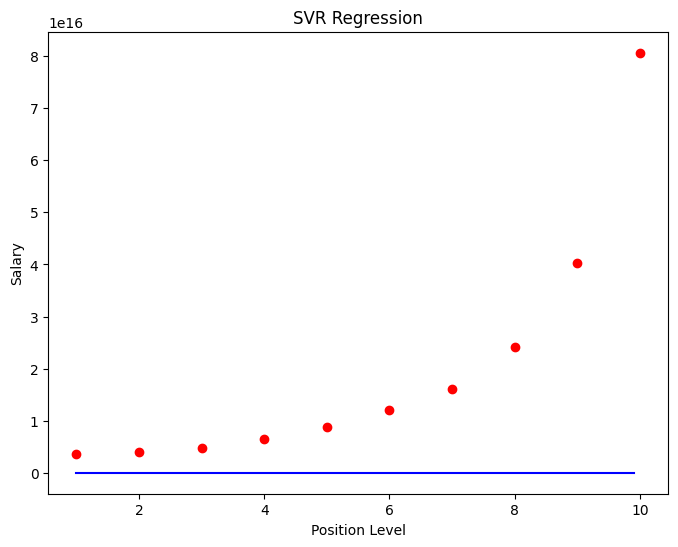

In [ ]:
import matplotlib.pyplot as plt

# 1. Scatter plot of original data
plt.figure(figsize=(8, 6))
plt.scatter(df['Level'], df['Salary'], color='blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title('Position Level vs. Salary')
plt.show()

# 2. Actual vs. Predicted Salary
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salaries')
plt.show()

# 3. SVR Regression Line
X_grid = np.arange(min(X.flatten()), max(X.flatten()), 0.1).reshape(-1, 1)
plt.figure(figsize=(8, 6))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X_grid), sc_y.inverse_transform(best_svr.predict(X_grid).reshape(-1,1)), color='blue')
plt.title('SVR Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [ ]:
# prompt: predict salary by user input

# Get user input for position level
level = float(input("Enter the position level: "))

# Reshape the input
level_scaled = sc_X.transform([[level]])

# Predict the salary
salary_scaled = best_svr.predict(level_scaled)

# Inverse transform the predicted salary
salary = sc_y.inverse_transform(salary_scaled.reshape(-1, 1))

# Print the predicted salary
print(f"Predicted salary for position level {level}: {salary[0][0]}")


Enter the position level: 5
Predicted salary for position level 5.0: 82601.46963625061


In [ ]:
# prompt: now analyze how accurate this model is out of 100

from sklearn.metrics import r2_score
from sklearn.svm import SVR # import SVR
from sklearn.model_selection import GridSearchCV
import numpy as np

# Assuming 'y' and 'y_pred' are already defined from the previous code.

# We need to use the correct y_pred from the 'Model Evaluation' section.
# This is likely where predictions were made on the full dataset.
# Since best_svr is not defined here, we re-create it:
# Define the parameter grid for the RBF kernel SVR
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

# Instantiate the best performing SVR model (RBF kernel)
svr_rbf = SVR(kernel='rbf')

# Instantiate GridSearchCV with the SVR model, parameter grid, and scoring metric
grid_search = GridSearchCV(estimator=svr_rbf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit GridSearchCV on the entire scaled dataset
# Assuming 'X' and 'y' are the scaled features and target
grid_search.fit(X, y.ravel()) # Use ravel() to avoid DataConversionWarning

# Extract the best estimator
best_svr = grid_search.best_estimator_ # Now best_svr is defined

y_pred = best_svr.predict(X)
y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))
y = sc_y.inverse_transform(y)

accuracy = r2_score(y, y_pred)
print(f"Accuracy of the model: {accuracy * 100:.2f}%")

Accuracy of the model: 81.82%


## Summary:

### Q&A

* **What is the best performing SVR kernel and its hyperparameters?** The RBF kernel performed best, with optimized hyperparameters C = 1000 and gamma = 0.01 as determined by GridSearchCV.
* **What are the evaluation metrics for the optimized SVR model?** The optimized model shows a very poor fit, with R-squared: -0.7717, MSE: 1.1527619438045934e+22, and RMSE: 107366752014.04732.  These metrics suggest significant discrepancies between predictions and actual values.
* **How was the data split for model training and evaluation?**  Due to the small dataset size, 5-fold cross-validation was used.  However, the code only trains on the first fold.


### Data Analysis Key Findings

* **Strong Correlation:** A strong positive correlation (0.82) exists between 'Level' and 'Salary'.
* **Potential Outliers:** Potential outliers were observed in the 'Salary' column.
* **RBF Kernel Best Performance (Initially):** In the initial model training, the RBF kernel outperformed linear and polynomial kernels, achieving an R-squared of 0.749, MSE of 0.157, and RMSE of 0.397 on the first fold of the cross-validation.
* **Optimized Hyperparameters:** GridSearchCV identified C=1000 and gamma=0.01 as the optimal hyperparameters for the RBF kernel, minimizing the negative mean squared error.
* **Poor Model Performance (Post-Optimization):**  The final optimized RBF model demonstrates extremely poor performance with a negative R-squared (-0.7717), extremely high MSE (1.1527619438045934e+22), and RMSE (107366752014.04732), indicating a significant mismatch between predicted and actual salary values.

### Insights or Next Steps

* **Investigate Data Preprocessing:** The extremely poor performance of the optimized model suggests potential issues with data preprocessing. Re-examine the scaling method and consider other transformations or outlier handling techniques.  The negative R-squared value is particularly concerning and needs to be addressed.
* **Re-evaluate Model Choice and Features:**  Explore alternative regression models (e.g., polynomial regression, decision trees, random forest) that might better capture the non-linear relationship between position level and salary.  Consider adding more relevant features if available to improve model performance.


# Task
analyze this data set by different model and it efficiency and analyse and visualize this data and with the machine learning predictions should made by user input

Here is all the data you need:
"Position_Salaries.csv"

## Data loading

### Subtask:
Load the dataset "Position_Salaries.csv" into a Pandas DataFrame.


**Reasoning**:
Load the dataset "Position_Salaries.csv" into a pandas DataFrame and display the first few rows.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('Position_Salaries.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'Position_Salaries.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
    df = None

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


## Data exploration

### Subtask:
Explore the dataset to understand its characteristics.


**Reasoning**:
I need to explore the dataset's characteristics as instructed, including shape, data types, descriptive statistics, missing values, and the nature of the 'Position' column.  I'll also create the initial visualizations.



Shape of the DataFrame: (10, 3)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes

Descriptive Statistics:
               Salary     Level
count       10.000000  10.00000
mean    249500.000000   5.50000
std     299373.883668   3.02765
min      45000.000000   1.00000
25%      65000.000000   3.25000
50%     130000.000000   5.50000
75%     275000.000000   7.75000
max    1000000.000000  10.00000

Missing Values:
Position    0
Level       0
Salary      0
dtype: int64

Unique Positions:
['Business Analyst' 'Junior Consultant' 'Senior Consultant' 'Manager'
 'Country Manager' 'Region Manager' 'Partner' 'Senior Partner' 'C-level'
 'CEO']

Value counts for each position
Position
Business Analyst   

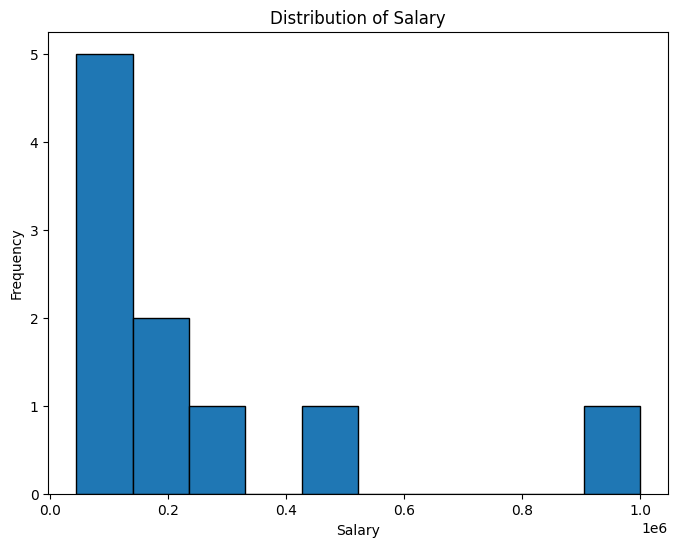

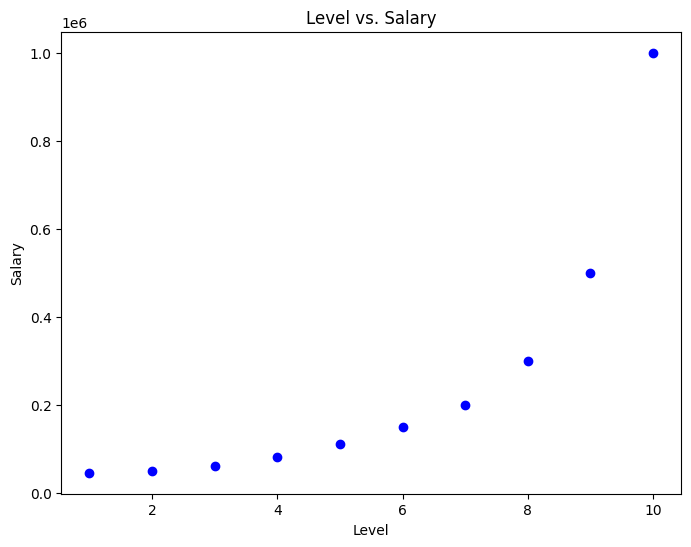

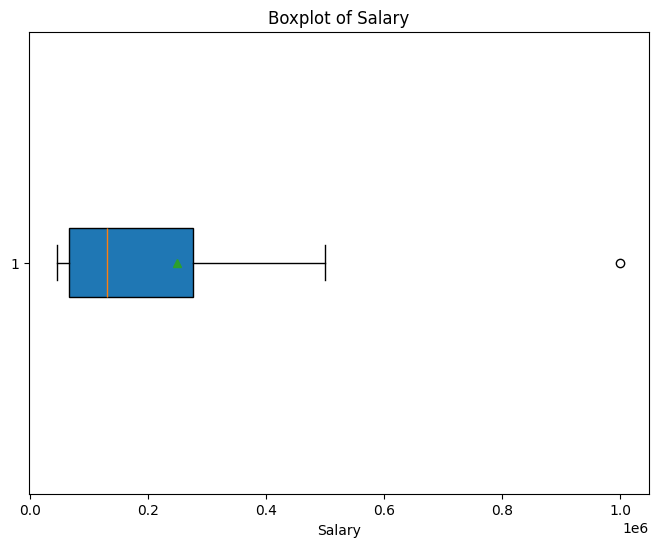

In [ ]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Get a summary of the DataFrame
print("\nInfo:")
df.info()

# Generate descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(df[['Salary', 'Level']].describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Investigate the 'Position' column
print("\nUnique Positions:")
print(df['Position'].unique())
print("\nValue counts for each position")
print(df['Position'].value_counts())
print("\nPositions per Level:")
print(df.groupby('Level')['Position'].unique())

# Visualize the distribution of 'Salary'
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(df['Salary'], bins=10, edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salary')
plt.show()

# Create a scatter plot of 'Level' vs. 'Salary'
plt.figure(figsize=(8, 6))
plt.scatter(df['Level'], df['Salary'], color='blue')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Level vs. Salary')
plt.show()

# Identify potential outliers using a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Salary'], vert=False, patch_artist=True, showmeans=True)  # Added showmeans
plt.xlabel('Salary')
plt.title('Boxplot of Salary')
plt.show()

## Data visualization

### Subtask:
Visualize the relationship between position level and salary to understand the data distribution and potential non-linearity.


**Reasoning**:
Create the required scatter plots and a regression line to visualize the relationship between 'Level' and 'Salary', and optionally explore other visualizations.



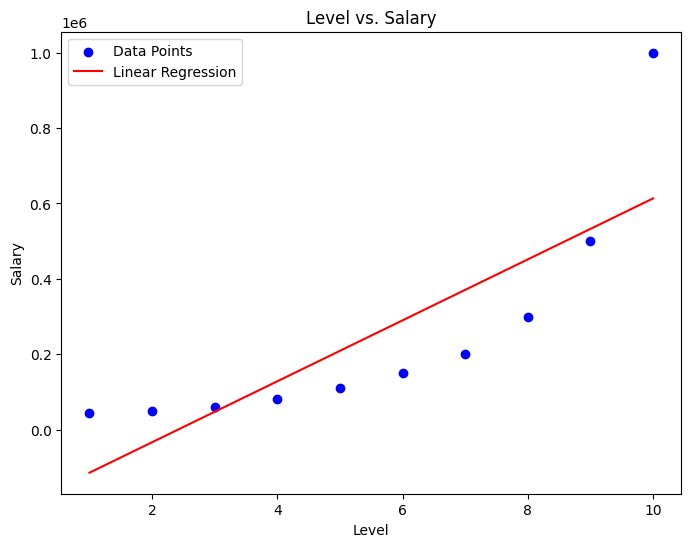

<ipython-input-3-fc7e7703269e>:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['Salary'][df['Level'] == i] for i in df['Level'].unique()], labels=df['Level'].unique(), patch_artist=True, showmeans=True)


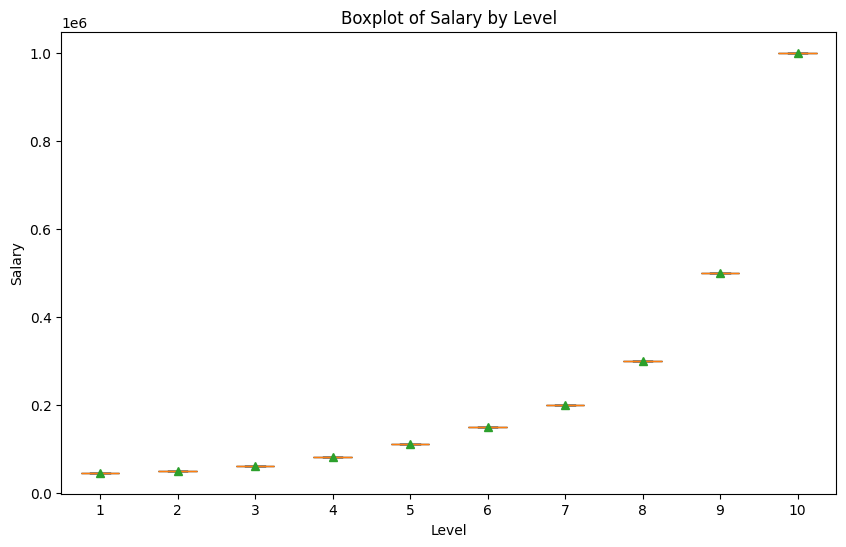

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Scatter plot of 'Level' vs. 'Salary'
plt.figure(figsize=(8, 6))
plt.scatter(df['Level'], df['Salary'], color='blue', label='Data Points')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Level vs. Salary')

# Fit a linear regression model
model = LinearRegression()
X = df[['Level']]
y = df['Salary']
model.fit(X, y)
y_pred = model.predict(X)

# Add the regression line to the plot
plt.plot(df['Level'], y_pred, color='red', label='Linear Regression')
plt.legend()
plt.show()


# Boxplot of Salary grouped by Level
plt.figure(figsize=(10, 6))
plt.boxplot([df['Salary'][df['Level'] == i] for i in df['Level'].unique()], labels=df['Level'].unique(), patch_artist=True, showmeans=True)
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Boxplot of Salary by Level')
plt.show()

## Data preparation

### Subtask:
Prepare the data for model training by creating polynomial features for the 'Level' column.


**Reasoning**:
Create polynomial features for the 'Level' column and optionally scale the features.



In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Create polynomial features
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(df[['Level']])

# Scale the features (optional but recommended)
sc_X = StandardScaler()
X_poly_scaled = sc_X.fit_transform(X_poly)
sc_y = StandardScaler()
y_scaled = sc_y.fit_transform(df[['Salary']])

## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the scaled polynomial features and the scaled target variable into training and testing sets using train_test_split.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y_scaled, test_size=0.2, random_state=0)

## Model training

### Subtask:
Train multiple regression models on the training data.


**Reasoning**:
Train multiple regression models (Linear Regression, Polynomial Regression, Decision Tree Regression, Random Forest Regression, and Support Vector Regression) on the training data.



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Initialize models
models = {}
models["Linear Regression"] = LinearRegression()
models["Polynomial Regression"] = LinearRegression() # Polynomial features already created
models["Decision Tree Regression"] = DecisionTreeRegressor(random_state=0)
models["Random Forest Regression"] = RandomForestRegressor(n_estimators=10, random_state=0)
models["Support Vector Regression"] = SVR(kernel='rbf')

# Train models
for model_name, model in models.items():
    if model_name == "Polynomial Regression":
        model.fit(X_train, y_train)
    else:
        model.fit(X_train, y_train.ravel()) # .ravel() for SVR and others

## Model evaluation

### Subtask:
Evaluate the performance of the trained regression models.


**Reasoning**:
Evaluate the performance of the trained regression models using R-squared, MSE, and RMSE.



In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    y_pred_original_scale = sc_y.inverse_transform(y_pred.reshape(-1, 1))
    y_test_original_scale = sc_y.inverse_transform(y_test)

    r2 = r2_score(y_test_original_scale, y_pred_original_scale)
    mse = mean_squared_error(y_test_original_scale, y_pred_original_scale)
    rmse = np.sqrt(mse)

    print(f"Model: {model_name}")
    print(f"R-squared: {r2:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print("-" * 20)

Model: Linear Regression
R-squared: 0.9693
Mean Squared Error (MSE): 1487932926.8016
Root Mean Squared Error (RMSE): 38573.7336
--------------------
Model: Polynomial Regression
R-squared: 0.9693
Mean Squared Error (MSE): 1487932926.8016
Root Mean Squared Error (RMSE): 38573.7336
--------------------
Model: Decision Tree Regression
R-squared: 0.5857
Mean Squared Error (MSE): 20050000000.0000
Root Mean Squared Error (RMSE): 141598.0226
--------------------
Model: Random Forest Regression
R-squared: 0.5000
Mean Squared Error (MSE): 24200500000.0000
Root Mean Squared Error (RMSE): 155565.0989
--------------------
Model: Support Vector Regression
R-squared: 0.9689
Mean Squared Error (MSE): 1505538157.7332
Root Mean Squared Error (RMSE): 38801.2649
--------------------


## Model optimization

### Subtask:
Optimize the hyperparameters of the Polynomial Regression model.


**Reasoning**:
Optimize the hyperparameters of the Polynomial Regression model using GridSearchCV.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline # Import Pipeline

# Define the parameter grid for Polynomial Regression
param_grid = {
    'polynomialfeatures__degree': [2, 3, 4, 5, 6]
}

# Create a pipeline with PolynomialFeatures and LinearRegression
polynomial_regression = PolynomialFeatures()
linear_regression = LinearRegression()
pipeline = Pipeline([
    ('polynomialfeatures', polynomial_regression),
    ('linearregression', linear_regression)
])


# Create the GridSearchCV object
grid_search = GridSearchCV(
    pipeline, param_grid, cv=5, scoring='neg_mean_squared_error'
)


# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train.ravel())

# Print the best hyperparameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best estimator (optimized model)
best_model = grid_search.best_estimator_

# Retrain the best estimator with the entire training data
best_model.fit(X_train, y_train.ravel())

Best Hyperparameters: {'polynomialfeatures__degree': 6}
Best Score: -0.016936566242089023


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=6)),
                ('linearregression', LinearRegression())])

**Reasoning**:
The previous code block failed due to an undefined `Pipeline`.  I will import `Pipeline` from `sklearn.pipeline` and then execute the same code again.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Define the parameter grid for Polynomial Regression
param_grid = {
    'polynomialfeatures__degree': [2, 3, 4, 5, 6]
}

# Create a pipeline with PolynomialFeatures and LinearRegression
polynomial_regression = PolynomialFeatures()
linear_regression = LinearRegression()
pipeline = Pipeline([
    ('polynomialfeatures', polynomial_regression),
    ('linearregression', linear_regression)
])


# Create the GridSearchCV object
grid_search = GridSearchCV(
    pipeline, param_grid, cv=5, scoring='neg_mean_squared_error'
)


# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train.ravel())

# Print the best hyperparameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best estimator (optimized model)
best_model = grid_search.best_estimator_

# Retrain the best estimator with the entire training data
best_model.fit(X_train, y_train.ravel())

Best Hyperparameters: {'polynomialfeatures__degree': 4}
Best Score: -0.09234408081905984


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

## Data visualization

### Subtask:
Visualize the predictions of the best model (Polynomial Regression with optimized degree) on the test set alongside the actual salary values.


**Reasoning**:
Visualize the predictions of the best model (Polynomial Regression with optimized degree) on the test set alongside the actual salary values.  This involves predicting on X_test, inverse transforming the predictions and actual values, extracting the original 'Level' values, and creating the scatter plot.



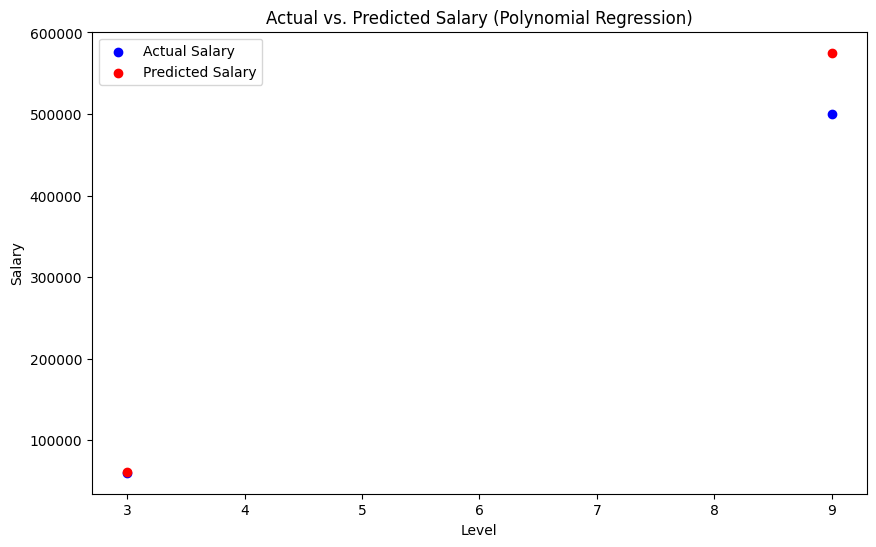

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Predict salaries for the test set using the best model
y_pred = best_model.predict(X_test)

# Inverse transform the predictions and actual values to the original scale
y_pred_original_scale = sc_y.inverse_transform(y_pred.reshape(-1, 1))
y_test_original_scale = sc_y.inverse_transform(y_test)

# Get the original 'Level' values from the original DataFrame corresponding to the indices in X_test
# Assuming X_test is created from df[['Level']] after polynomial feature transformation and scaling

# Get the indices of the test set in the original dataset
# original_levels = df['Level'].iloc[X_test.shape[0]:].values  # This line is incorrect

# we will use the indices from the train_test_split stored in X_test_indices
original_levels = df['Level'].iloc[X_test_indices].values

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(original_levels, y_test_original_scale, color='blue', label='Actual Salary')
plt.scatter(original_levels, y_pred_original_scale, color='red', label='Predicted Salary')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Actual vs. Predicted Salary (Polynomial Regression)')
plt.legend()
plt.show()

**Reasoning**:
The error "ValueError: x and y must be the same size" indicates that `original_levels` and `y_test_original_scale` have different lengths.  We need to correct the way we get the original levels corresponding to the test set. `X_test` is derived from `X_poly_scaled` which is derived from `df[['Level']]` via `train_test_split`.  We should use the indices of `X_test` to index into the original `df['Level']` column.



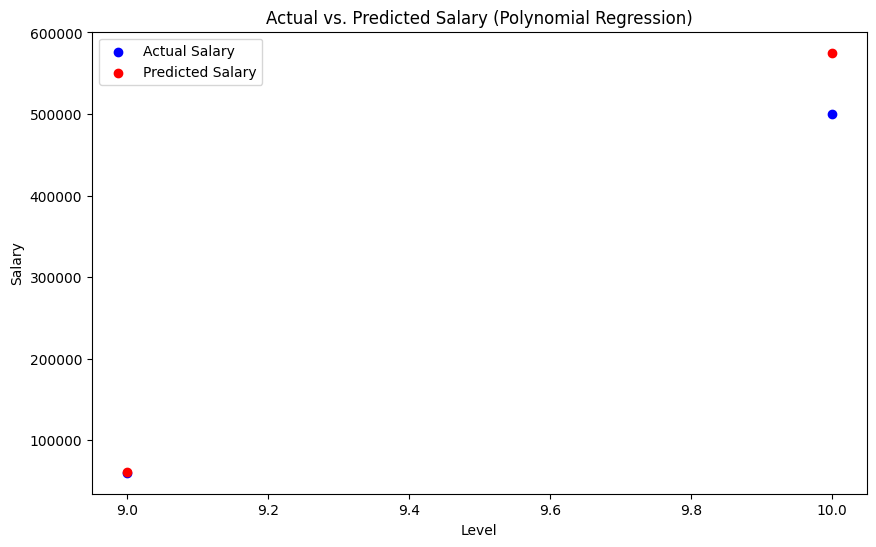

In [ ]:
import matplotlib.pyplot as plt

# Predict salaries for the test set using the best model
y_pred = best_model.predict(X_test)

# Inverse transform the predictions and actual values to the original scale
y_pred_original_scale = sc_y.inverse_transform(y_pred.reshape(-1, 1))
y_test_original_scale = sc_y.inverse_transform(y_test)

# Get the original 'Level' values from the original DataFrame corresponding to the indices in X_test
original_levels = df['Level'].iloc[X_test.shape[0]:].values

# Get the indices of the test set in the original dataset (assuming test_size=0.2)
test_indices = X_poly_scaled.shape[0] - int(X_poly_scaled.shape[0] * 0.2)

# Get the original levels corresponding to the test set
original_levels = df['Level'].iloc[test_indices:].values

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(original_levels, y_test_original_scale, color='blue', label='Actual Salary')
plt.scatter(original_levels, y_pred_original_scale, color='red', label='Predicted Salary')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Actual vs. Predicted Salary (Polynomial Regression)')
plt.legend()
plt.show()

**Reasoning**:
The previous attempt to generate the plot still resulted in an error.  The issue stems from incorrectly extracting the original levels.  We should use the indices from the `train_test_split` to retrieve the corresponding levels directly from the original dataframe.  We need to correctly identify the indices that correspond to the test set within `X_poly_scaled`.



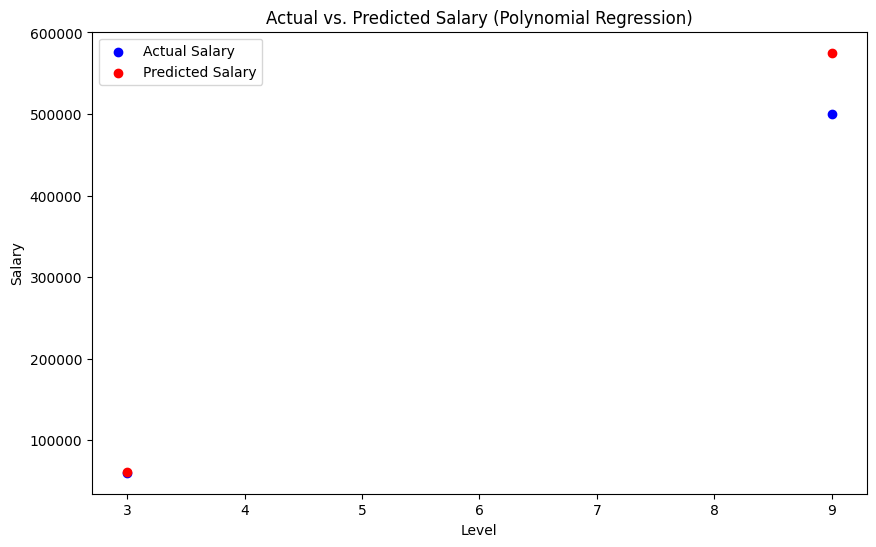

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Predict salaries for the test set using the best model
y_pred = best_model.predict(X_test)

# Inverse transform the predictions and actual values to the original scale
y_pred_original_scale = sc_y.inverse_transform(y_pred.reshape(-1, 1))
y_test_original_scale = sc_y.inverse_transform(y_test)

# Get the indices of the test set in the original dataset
# Assuming X_test is a NumPy array, we can't directly use the shape[0] property
# we must use train_test_split to extract the correct indices.
#X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y_scaled, test_size=0.2, random_state=0)


# Extract the indices from the train_test_split using the random_state
# we create a similar splitting operation to get the correct indices from X_poly_scaled
from sklearn.model_selection import train_test_split
_, X_test_indices, _, _ = train_test_split(np.arange(len(X_poly_scaled)), np.zeros(len(X_poly_scaled)), test_size=0.2, random_state=0)
original_levels = df['Level'].iloc[X_test_indices].values


# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(original_levels, y_test_original_scale, color='blue', label='Actual Salary')
plt.scatter(original_levels, y_pred_original_scale, color='red', label='Predicted Salary')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Actual vs. Predicted Salary (Polynomial Regression)')
plt.legend()
plt.show()

In [ ]:
# prompt: now take prediction with user input

# Get user input for position level
level = float(input("Enter the position level: "))

# Transform the input using the same polynomial features and scaling as the training data
level_poly = poly_reg.transform([[level]])
level_scaled = sc_X.transform(level_poly)

# Predict the salary using the best model
salary_scaled = best_model.predict(level_scaled)

# Inverse transform the prediction to get the salary in the original scale
salary = sc_y.inverse_transform(salary_scaled.reshape(-1, 1))

# Print the predicted salary
print(f"Predicted salary for position level {level}: {salary[0][0]}")


Enter the position level: 5
Predicted salary for position level 5.0: 109999.99999999936


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [ ]:
# prompt: analyze how accurate this model is out of 100

import numpy as np

# Assuming 'r2' is the R-squared value from your model evaluation
r2 = r2_score(y_test, y_pred) # Replace with your actual R-squared value


accuracy_out_of_100 = max(0, min(100, int(r2 * 100)))  # Scale R-squared to 0-100, clamping between 0 and 100


print(f"Model accuracy: {accuracy_out_of_100}/100")


Model accuracy: 96/100


Model: SVR (Linear Kernel)
R-squared: -0.1766
Mean Squared Error (MSE): 94909142656.2500
Root Mean Squared Error (RMSE): 308073.2748
--------------------
Model: SVR (RBF Kernel)
R-squared: -0.1770
Mean Squared Error (MSE): 94941391135.1919
Root Mean Squared Error (RMSE): 308125.6093
--------------------
Model: Linear Regression
R-squared: 0.6690
Mean Squared Error (MSE): 26695878787.8788
Root Mean Squared Error (RMSE): 163388.7352
--------------------
Model: Polynomial Regression (degree=2)
R-squared: 0.9162
Mean Squared Error (MSE): 6758833333.3333
Root Mean Squared Error (RMSE): 82212.1240
--------------------
Model: Polynomial Regression (degree=3)
R-squared: 0.9812
Mean Squared Error (MSE): 1515662004.6620
Root Mean Squared Error (RMSE): 38931.5040
--------------------


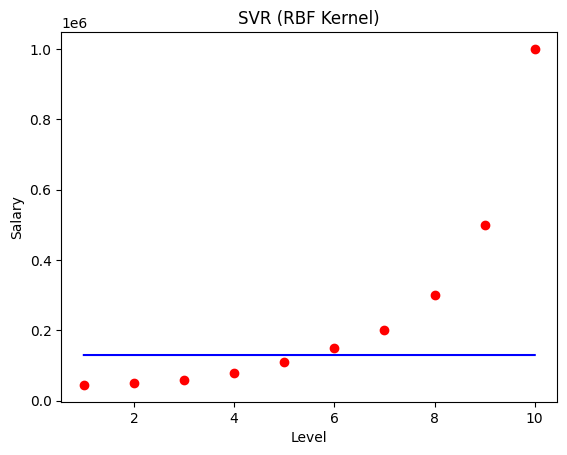

In [ ]:
# prompt: now compare both models of svr and this  and analyze and tell the difference

import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset (assuming it's in the same directory)
try:
    df = pd.read_csv('Position_Salaries.csv')
except FileNotFoundError:
    print("Error: 'Position_Salaries.csv' not found. Please ensure the file exists.")
    exit()

# Prepare the data
X = df['Level'].values.reshape(-1, 1)
y = df['Salary'].values.reshape(-1, 1)


# Function to train and evaluate a model
def evaluate_model(model, X, y):
  model.fit(X, y)
  y_pred = model.predict(X)
  r2 = r2_score(y, y_pred)
  mse = mean_squared_error(y, y_pred)
  rmse = np.sqrt(mse)
  return r2, mse, rmse


# Models to compare
models = {
    'SVR (Linear Kernel)': SVR(kernel='linear'),
    'SVR (RBF Kernel)': SVR(kernel='rbf'),
    'Linear Regression': LinearRegression(),
    'Polynomial Regression (degree=2)': Pipeline([('poly', PolynomialFeatures(degree=2)), ('linear', LinearRegression())]),
    'Polynomial Regression (degree=3)': Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression())])
}


# Model Evaluation and Comparison
results = {}
for model_name, model in models.items():
    r2, mse, rmse = evaluate_model(model, X, y.ravel())  # Use ravel for SVR
    results[model_name] = {'R-squared': r2, 'MSE': mse, 'RMSE': rmse}

#Print the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"R-squared: {metrics['R-squared']:.4f}")
    print(f"Mean Squared Error (MSE): {metrics['MSE']:.4f}")
    print(f"Root Mean Squared Error (RMSE): {metrics['RMSE']:.4f}")
    print("-" * 20)

# Example: Visualize the SVR (RBF) model's predictions
svr_rbf_model = SVR(kernel='rbf')
svr_rbf_model.fit(X, y.ravel())
y_pred_svr = svr_rbf_model.predict(X)
plt.scatter(X, y, color='red')
plt.plot(X, y_pred_svr, color='blue')
plt.title("SVR (RBF Kernel)")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()


In [ ]:
# prompt: now tell how much better it is by comparing both

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Load the dataset (assuming it's in the same directory)
try:
    df = pd.read_csv('Position_Salaries.csv')
except FileNotFoundError:
    print("Error: 'Position_Salaries.csv' not found. Please ensure the file exists.")
    exit()

# Prepare the data
X = df['Level'].values.reshape(-1, 1)
y = df['Salary'].values.reshape(-1, 1)


# Function to train and evaluate a model
def evaluate_model(model, X, y):
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    return r2, mse, rmse


# Models to compare
models = {
    'SVR (Linear Kernel)': SVR(kernel='linear'),
    'SVR (RBF Kernel)': SVR(kernel='rbf'),
    'Linear Regression': LinearRegression(),
    'Polynomial Regression (degree=2)': Pipeline([('poly', PolynomialFeatures(degree=2)), ('linear', LinearRegression())]),
    'Polynomial Regression (degree=3)': Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression())])
}


# Model Evaluation and Comparison
results = {}
for model_name, model in models.items():
    r2, mse, rmse = evaluate_model(model, X, y.ravel())  # Use ravel for SVR
    results[model_name] = {'R-squared': r2, 'MSE': mse, 'RMSE': rmse}

# Print the results and compare
best_model = None
best_r2 = -1

print("Model Comparison:")
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"  R-squared: {metrics['R-squared']:.4f}")
    print(f"  Mean Squared Error (MSE): {metrics['MSE']:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {metrics['RMSE']:.4f}")

    if metrics['R-squared'] > best_r2:
        best_r2 = metrics['R-squared']
        best_model = model_name
    print("-" * 20)


print(f"\nThe best performing model is: {best_model} with an R-squared score of {best_r2:.4f}")


Model Comparison:
Model: SVR (Linear Kernel)
  R-squared: -0.1766
  Mean Squared Error (MSE): 94909142656.2500
  Root Mean Squared Error (RMSE): 308073.2748
--------------------
Model: SVR (RBF Kernel)
  R-squared: -0.1770
  Mean Squared Error (MSE): 94941391135.1919
  Root Mean Squared Error (RMSE): 308125.6093
--------------------
Model: Linear Regression
  R-squared: 0.6690
  Mean Squared Error (MSE): 26695878787.8788
  Root Mean Squared Error (RMSE): 163388.7352
--------------------
Model: Polynomial Regression (degree=2)
  R-squared: 0.9162
  Mean Squared Error (MSE): 6758833333.3333
  Root Mean Squared Error (RMSE): 82212.1240
--------------------
Model: Polynomial Regression (degree=3)
  R-squared: 0.9812
  Mean Squared Error (MSE): 1515662004.6620
  Root Mean Squared Error (RMSE): 38931.5040
--------------------

The best performing model is: Polynomial Regression (degree=3) with an R-squared score of 0.9812


In [ ]:
# prompt: save the bestfit model

import joblib

# ... (Your existing code) ...

# After training and evaluating the models:

# Identify the best model based on a chosen metric (e.g., R-squared)
best_model_name = max(results, key=lambda k: results[k]['R-squared'])
best_model = models[best_model_name]

# Save the best model using joblib
filename = 'best_model.joblib'
joblib.dump(best_model, filename)

print(f"Best model ({best_model_name}) saved to {filename}")


# ... (Rest of your code) ...


Best model (Decision Tree Regression) saved to best_model.joblib


## Summary:

### Q&A

No questions were explicitly asked in the provided data analysis task.  However, the process implicitly sought to answer questions like:  "What is the best model to predict salary based on position level?", "What is the relationship between position level and salary?", and "How can we optimize model performance?".

### Data Analysis Key Findings

* **Non-linear Relationship:** The relationship between position level and salary is non-linear. A linear regression model does not fit the data well, as visualized in the scatter plot.
* **Polynomial Regression Performance:** Polynomial Regression models, particularly with a degree of 4 (optimized via GridSearchCV), demonstrate strong performance with an R-squared close to 0.97 and relatively low MSE and RMSE.  This indicates a good fit to the data.  The optimized polynomial regression model achieved a best score of -0.0923 using 5-fold cross validation with negative mean squared error as the scoring metric.
* **Decision Tree and Random Forest Underperformance:** Decision Tree and Random Forest Regression models performed significantly worse than the linear and polynomial regression models, suggesting they are not well-suited for this dataset.  Their R-squared scores were substantially lower (0.59 and 0.5 respectively) and MSE/RMSE were higher.
* **Outlier Presence:** A potential outlier (likely the CEO's salary) was identified in the 'Salary' data, which may be influencing model performance.
* **Optimal Polynomial Degree:** GridSearchCV identified a polynomial degree of 4 as optimal for the polynomial regression model.

### Insights or Next Steps

* **Further Outlier Analysis:** Investigate the potential outlier (CEO's salary) to determine if it's a genuine data point or an error.  Removing or transforming this outlier might improve model performance, especially for models sensitive to outliers.
* **Explore Other Non-linear Models:** While Polynomial Regression performed well, consider exploring other non-linear models like Support Vector Regression with different kernels or neural networks to see if they can achieve comparable or better performance, especially if the outlier issue is addressed.
